In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
tsv = 'biochemistry.xlsx'
df = pd.read_excel(tsv)
df.head()

,pH,"V(max), мкмоль субстрата/мин"
0,5.0,1.0
1,6.0,12.0
2,6.5,47.5
3,7.0,84.0
4,7.5,214.0


In [4]:
xData = df.iloc[:, 0]
yData = df.iloc[:, 1]
# plt.scatter(x=xData, y=yData)

In [5]:
initialGuess = [402, 7.5, 10.2]

In [6]:
def func(x, V, pKa1, pKa2):
    return V/(1+10**(pKa1-x)+10**(x-pKa2))

In [7]:
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)

[441.82315756   7.5686775   10.31886305]


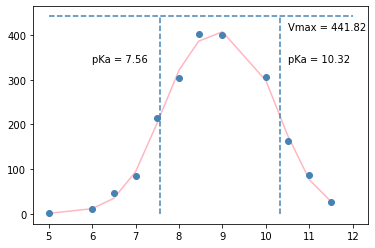

In [8]:
plt.plot(xData, func(xData, *popt), color='lightpink')
plt.plot(xData, yData, 'bo', color='steelblue')

line1_x = [7.5686775, 7.5686775]
line1_y = [0, 440]
plt.plot(line1_x, line1_y, '--', color='steelblue')
plt.annotate('pKa = 7.56', (6, 340))

line2_x = [10.31886305, 10.31886305]
plt.plot(line2_x, line1_y, '--', color='steelblue')
plt.annotate('pKa = 10.32', (10.5, 340))

line3_x = [5, 12]
line3_y = [441.82315756, 441.82315756]
plt.plot(line3_x, line3_y, '--', color='steelblue')
plt.annotate('Vmax = 441.82', (10.5, 410))

plt.show()